In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


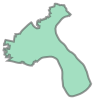

In [3]:
zipcodes.loc[0, 'geometry']

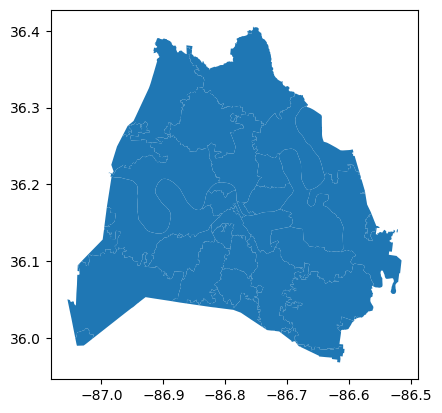

In [4]:
zipcodes.plot();

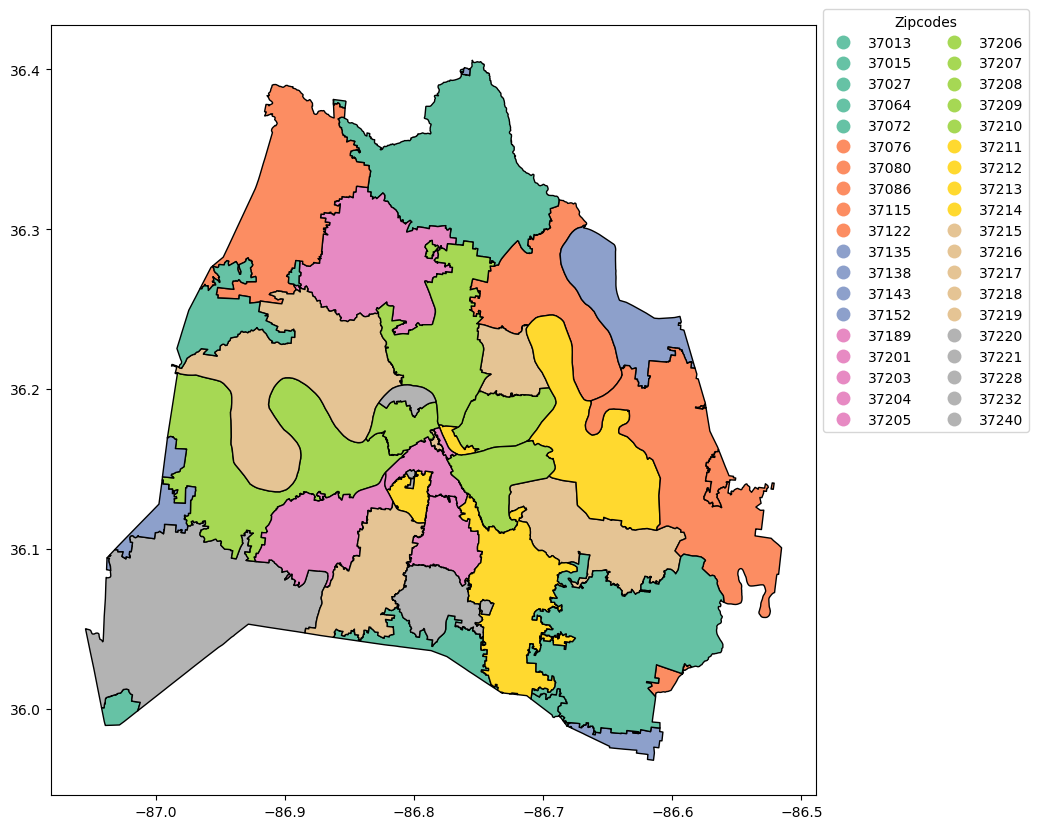

In [5]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [6]:
parks = gpd.read_file('../data/parks.geojson')
print(parks.crs)
parks.head( )

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [7]:
type(parks)

geopandas.geodataframe.GeoDataFrame

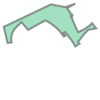

In [8]:
parks.loc[0, 'geometry']

In [9]:
print(parks.loc[0, 'geometry'])

MULTIPOLYGON (((-86.95546524763979 36.07930145579854, -86.95577768867267 36.0791390934377, -86.95554165522448 36.07881679726515, -86.95555002481612 36.07876336296327, -86.95547131924887 36.07872072961796, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.07839107173579, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.07829407526238, -86.95521421491281 36.07826638490727, -86.95520846364511 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.07815386881271, -86.95519898519579 36.07812557509128, -86.95519999833 36.07809727154806, -86.95520236476608 36.07806895638105, -86.9552057503346 36.07804090893737, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.07813012168268, -86.95500338104712 36.07803322156244, -86.9550

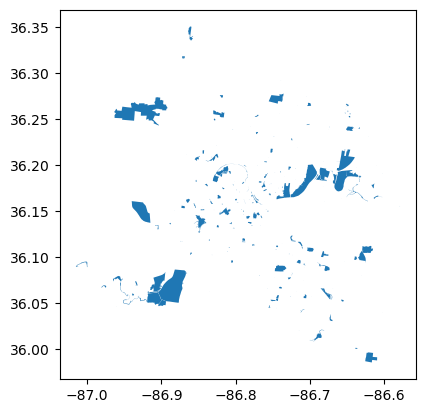

In [10]:
parks.plot();

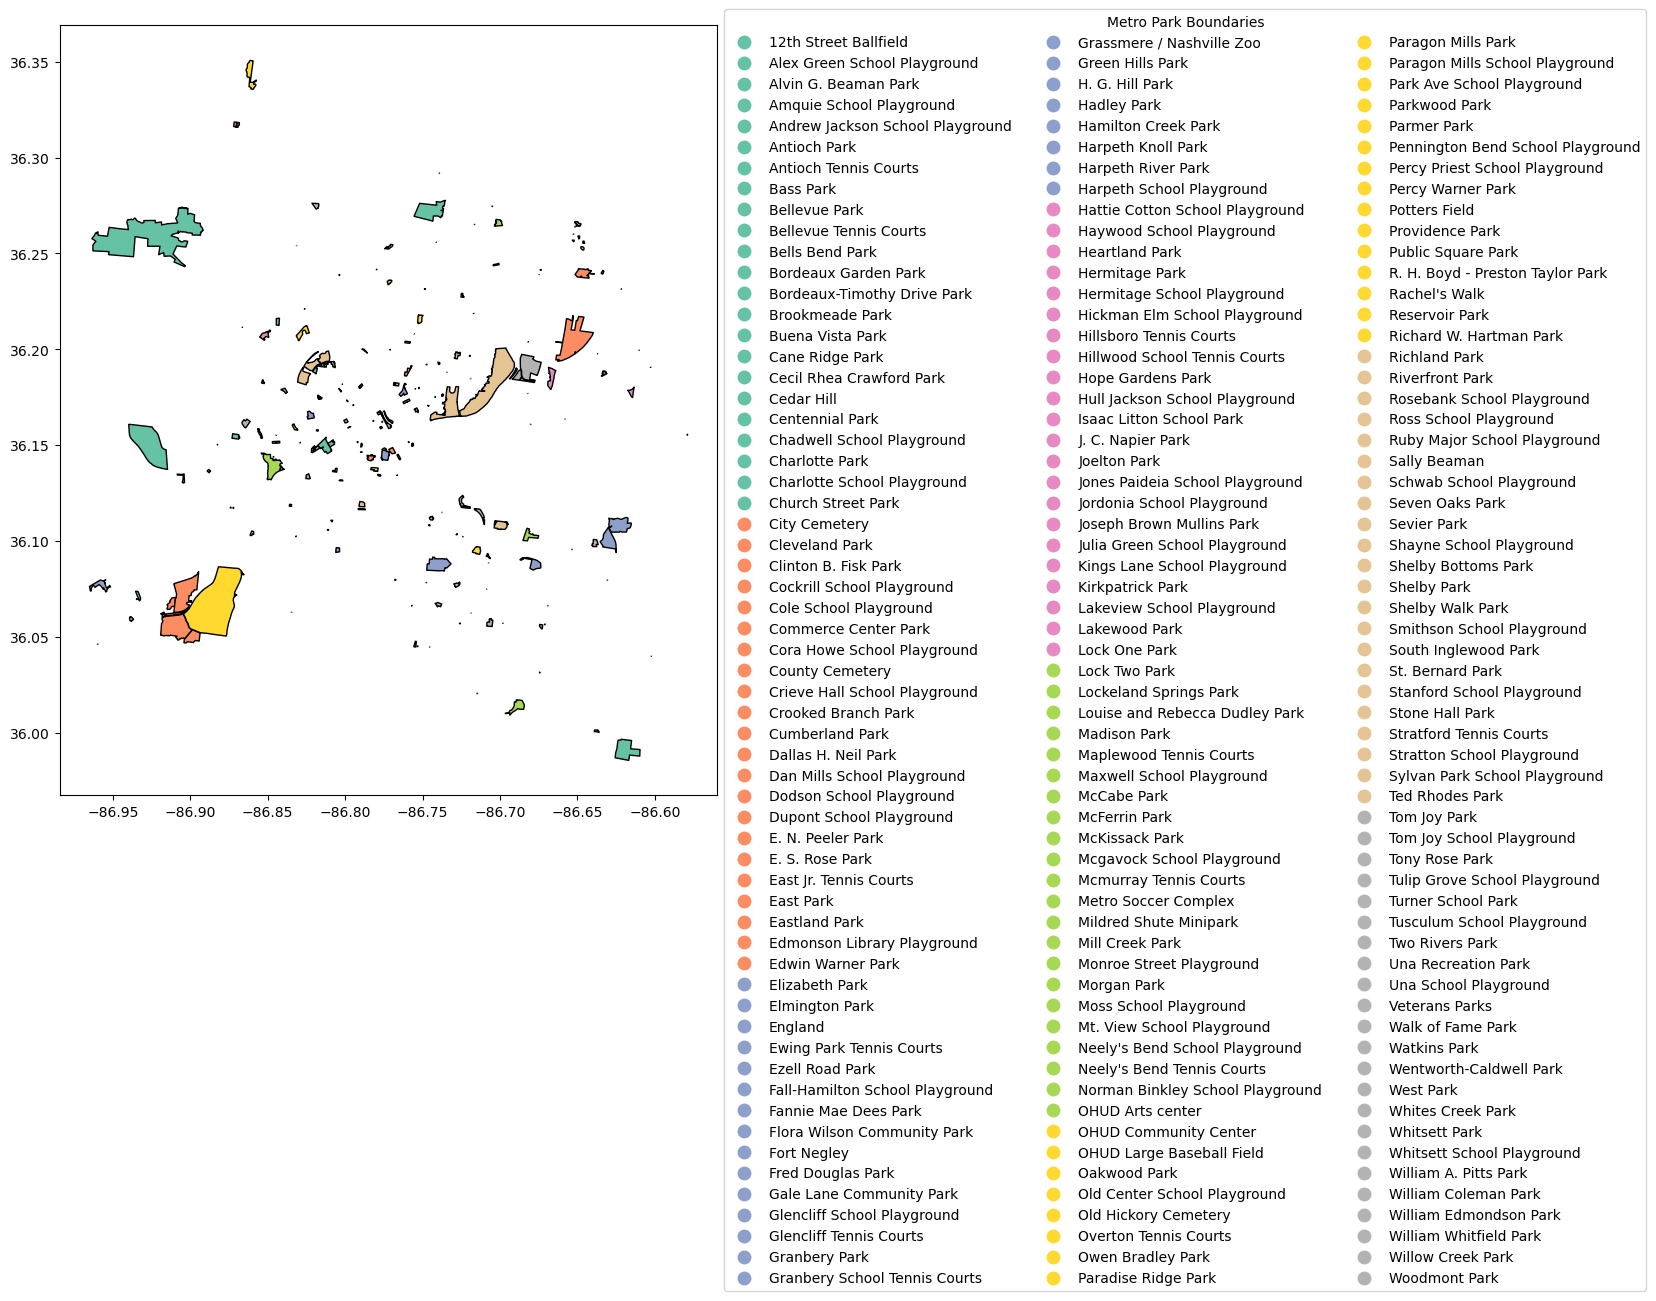

In [11]:
leg_kwds = {'title': 'Metro Park Boundaries', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

parks.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [12]:
type(parks)

geopandas.geodataframe.GeoDataFrame

In [13]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [14]:
parks_by_zip = gpd.sjoin(parks, zipcodes, op = 'within')

C:\Users\macke\anaconda3\envs\geospatial\lib\site-packages\geopandas\sindex.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (idx, item) in enumerate(geometry.iteritems())


In [15]:
parks_by_zip.head()

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...",7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...",7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...",7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
127,0.51,Bellevue Tennis Courts,0,Bellevue Tennis Courts,TENNIS,Colice Jeane Rd @ Baugh Rd,0,0,None,"MULTIPOLYGON (((-86.93431 36.07001, -86.93416 ...",7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
154,0.1,Harpeth School Playground,2002,Harpeth School Playground,PLAYGROUND,Learning Ln @ Collins Rd,0,0,None,"MULTIPOLYGON (((-86.95997 36.04626, -86.95980 ...",7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319


In [16]:
parks_by_zip['zip'].value_counts()

37221    21
37214    19
37208    18
37228    17
37013    16
37211    16
37209    15
37201    13
37206    13
37203    12
37218    12
37138    11
37207    10
37076     9
37205     8
37115     7
37217     6
37210     6
37215     5
37216     4
37204     3
37212     3
37189     3
37220     2
37027     2
37080     2
37219     2
37213     1
37072     1
Name: zip, dtype: int64

In [17]:
parks_by_zip37211 = parks_by_zip.loc[parks_by_zip['zip'] == '37211']
parks_by_zip37211.shape

(16, 16)

In [18]:
parks_by_zip37211.head(16)

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
62,13.53,Wentworth-Caldwell Park,2007,Caldwell,PARK,4927 Edmondson Pikex,-86.72782806,36.07724296,"Huge, open grassy field. Perfect for soccer.","MULTIPOLYGON (((-86.72728 36.07799, -86.72703 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
68,0.743,Turner School Park,2006,Turner School,PARK,507 Tanksley Ave,-86.74540945,36.1081866,Turner School Park is great for a small park; ...,"MULTIPOLYGON (((-86.74555 36.10849, -86.74555 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
77,196.59,Grassmere / Nashville Zoo,0,Grassmere,PARK,3777 Nolensville Pike,-86.7400197,36.08774754,"The Nashville Zoo provides education programs,...","MULTIPOLYGON (((-86.74701 36.08815, -86.74670 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
85,35.68,Paragon Mills Park,1973,Paragon Mills,PARK,465 Benita Dr,-86.71480206,36.09511071,"Paragon Mills Park has baseball fields, basket...","MULTIPOLYGON (((-86.71519 36.09720, -86.71513 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
86,4.19,Providence Park,2003,Providence,PARK,4170 Providence Park Ln,-86.70762543,36.09214556,"Small, community park with playground and walk...","MULTIPOLYGON (((-86.70628 36.09110, -86.70629 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
122,0.1,Glencliff School Playground,2002,Glencliff School Playground,PLAYGROUND,Antioch Pike @ Glencliff Rd,0,0,None,"MULTIPOLYGON (((-86.72386 36.10248, -86.72380 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
123,0.68,Glencliff Tennis Courts,0,Glencliff Tennis Courts,TENNIS,Antioch Pike @ Glencliff Rd,0,0,None,"MULTIPOLYGON (((-86.72830 36.10367, -86.72793 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
125,0.1,Norman Binkley School Playground,2002,Norman Binkley School Playground,PLAYGROUND,Longdale Dr @ Walford Dr,0,0,None,"MULTIPOLYGON (((-86.74752 36.07850, -86.74749 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
126,0.1,Haywood School Playground,2002,Haywood School Playground,PLAYGROUND,Turley Dr @ Dade Dr,0,0,None,"MULTIPOLYGON (((-86.70840 36.07515, -86.70838 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
139,0.1,Tusculum School Playground,2002,Tusculum School Playground,PLAYGROUND,Nolensvill Pike @ Mcmurray Dr,0,0,None,"MULTIPOLYGON (((-86.71865 36.06263, -86.71857 ...",49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328


In [19]:
polygon37211 = zipcodes.loc[zipcodes['zip'] == '37211']
polygon37211.shape

(1, 6)

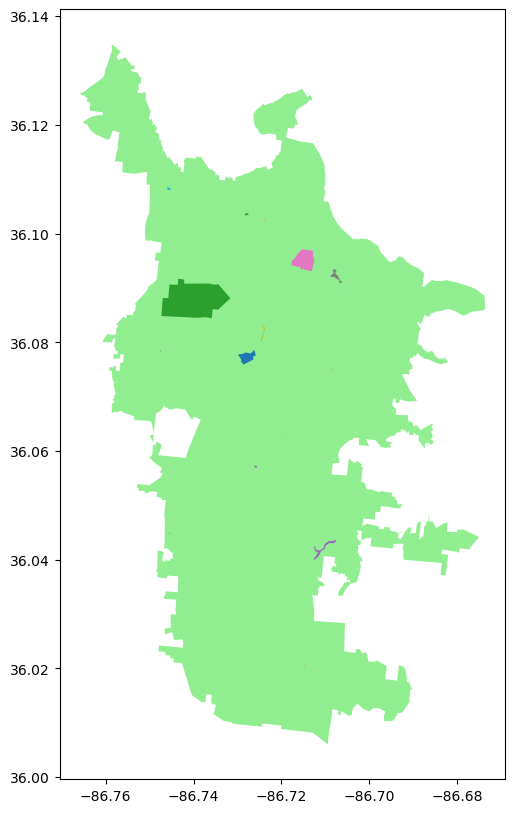

In [20]:
ax = polygon37211.plot(figsize = (8, 10), color = 'lightgreen')
parks_by_zip37211.plot( ax = ax, column = 'common_nam');
plt.show();

In [21]:
polygon37211.geometry.centroid

C:\Users\macke\AppData\Local\Temp\ipykernel_18272\2670406774.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37211.geometry.centroid


49    POINT (-86.72308 36.06711)
dtype: geometry

In [22]:
center = polygon37211.geometry.centroid[49]
print(center)

POINT (-86.72307880301152 36.06711142916258)


C:\Users\macke\AppData\Local\Temp\ipykernel_18272\1880818173.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37211.geometry.centroid[49]


In [23]:
area_center = [center.y, center.x]
print(area_center)

[36.06711142916258, -86.72307880301152]


In [24]:
map_37211 = folium.Map(location =  area_center, zoom_start = 12)
map_37211

In [25]:
i = 0
for row_index, row_values in parks_by_zip37211.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 62
values are:
 
acres                                                         13.53
name                                        Wentworth-Caldwell Park
year_estab                                                     2007
common_nam                                                 Caldwell
status                                                         PARK
address                                        4927 Edmondson Pikex
lon                                                    -86.72782806
lat                                                     36.07724296
descriptio             Huge, open grassy field. Perfect for soccer.
geometry          (POLYGON ((-86.72727534697989 36.0779869893801...
index_right                                                      49
zip                                                           37211
objectid                                                         39
po_name                                                   NASHVILLE
shape_stlength        

In [26]:
map_37211 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37211).add_to(map_37211)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in parks_by_zip37211.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['common_nam'])
    icon=folium.Icon(color="blue",icon="tree", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37211)
map_37211.save('../maps/map37211.html')

#display our map
map_37211

In [27]:
geo = parks_by_zip37211['geometry']

In [28]:
geo.head()

62    MULTIPOLYGON (((-86.72728 36.07799, -86.72703 ...
68    MULTIPOLYGON (((-86.74555 36.10849, -86.74555 ...
77    MULTIPOLYGON (((-86.74701 36.08815, -86.74670 ...
85    MULTIPOLYGON (((-86.71519 36.09720, -86.71513 ...
86    MULTIPOLYGON (((-86.70628 36.09110, -86.70629 ...
Name: geometry, dtype: geometry

In [29]:
centroid = []

for park in geo:
    centroid.append(park.centroid)

In [30]:
map_37211a = folium.Map(location =  area_center, zoom_start = 12)

map_fin = folium.GeoJson(geo).add_to(map_37211a)

In [31]:
map_37211a